1 45611.99869016642
2 45611.99869016641
3 45611.99869016641
4 45611.99869016641
5 45611.99869016641
6 45611.99869016641
7 45611.99869016641
8 45611.99869016641
9 45611.99869016641
10 45611.99869016641
11 45611.99869016641
12 45611.99869016641
13 45611.99869016641
14 45611.99869016641
15 45611.99869016641
16 45611.99869016641
17 45611.99869016641
18 45611.99869016641
19 45611.99869016641
20 45611.99869016641
21 45611.99869016641
22 45611.99869016641
23 45611.99869016641
24 45611.99869016641
25 45611.99869016641
26 45611.99869016641
27 45611.99869016641
28 45611.99869016641
29 45611.99869016641
30 45611.99869016641
31 45611.99869016641
32 45611.99869016641
33 45611.99869016641
34 45611.99869016641
35 45611.99869016641
36 45611.99869016641
37 45611.99869016641
38 45611.99869016641
39 45611.99869016641
40 45611.99869016641
41 45611.99869016641
42 45611.99869016641
43 45611.99869016641
44 45611.99869016641
45 45611.99869016641
46 45611.99869016641
47 45611.99869016641
48 45611.99869016641
4

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35268 (\N{CJK UNIFIED IDEOGRAPH-89C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21010 (\N{CJK UNIFIED IDEOGRAPH-5212}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

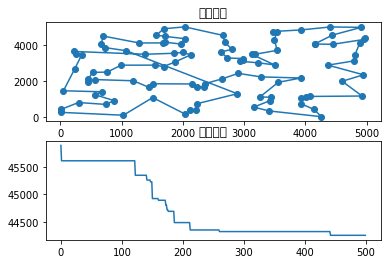

In [57]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


class PSO(object):
    def __init__(self, num_city, data):
        self.iter_max = 500  # 迭代数目
        self.num = 200  # 粒子数目
        self.num_city = num_city  # 城市数
        self.location = data # 城市的位置坐标
        # 计算距离矩阵
        self.dis_mat = self.compute_dis_mat(num_city, self.location)  # 计算城市之间的距离矩阵
        # 初始化所有粒子
        # self.particals = self.random_init(self.num, num_city)
        self.particals = self.greedy_init(self.dis_mat,num_total=self.num,num_city =num_city)
        self.lenths = self.compute_paths(self.particals)
        # 得到初始化群体的最优解
        init_l = min(self.lenths)
        init_index = self.lenths.index(init_l)
        init_path = self.particals[init_index]
        # 画出初始的路径图
        init_show = self.location[init_path]
        # 记录每个个体的当前最优解
        self.local_best = self.particals
        self.local_best_len = self.lenths
        # 记录当前的全局最优解,长度是iteration
        self.global_best = init_path
        self.global_best_len = init_l
        # 输出解
        self.best_l = self.global_best_len
        self.best_path = self.global_best
        # 存储每次迭代的结果，画出收敛图
        self.iter_x = [0]
        self.iter_y = [init_l]
    def greedy_init(self, dis_mat, num_total, num_city):
        start_index = 0
        result = []
        for i in range(num_total):
            rest = [x for x in range(0, num_city)]
            # 所有起始点都已经生成了
            if start_index >= num_city:
                start_index = np.random.randint(0, num_city)
                result.append(result[start_index].copy())
                continue
            current = start_index
            rest.remove(current)
            # 找到一条最近邻路径
            result_one = [current]
            while len(rest) != 0:
                tmp_min = math.inf
                tmp_choose = -1
                for x in rest:
                    if dis_mat[current][x] < tmp_min:
                        tmp_min = dis_mat[current][x]
                        tmp_choose = x

                current = tmp_choose
                result_one.append(tmp_choose)
                rest.remove(tmp_choose)
            result.append(result_one)
            start_index += 1
        return result

    # 随机初始化
    def random_init(self, num_total, num_city):
        tmp = [x for x in range(num_city)]
        result = []
        for i in range(num_total):
            random.shuffle(tmp)
            result.append(tmp.copy())
        return result

    # 计算不同城市之间的距离
    def compute_dis_mat(self, num_city, location):
        dis_mat = np.zeros((num_city, num_city))
        for i in range(num_city):
            for j in range(num_city):
                if i == j:
                    dis_mat[i][j] = np.inf
                    continue
                a = location[i]
                b = location[j]
                tmp = np.sqrt(sum([(x[0] - x[1]) ** 2 for x in zip(a, b)]))
                dis_mat[i][j] = tmp
        return dis_mat

    # 计算一条路径的长度
    def compute_pathlen(self, path, dis_mat):
        a = path[0]
        b = path[-1]
        result = dis_mat[a][b]
        for i in range(len(path) - 1):
            a = path[i]
            b = path[i + 1]
            result += dis_mat[a][b]
        return result

    # 计算一个群体的长度
    def compute_paths(self, paths):
        result = []
        for one in paths:
            length = self.compute_pathlen(one, self.dis_mat)
            result.append(length)
        return result

    # 评估当前的群体
    def eval_particals(self):
        min_lenth = min(self.lenths)
        min_index = self.lenths.index(min_lenth)
        cur_path = self.particals[min_index]
        # 更新当前的全局最优
        if min_lenth < self.global_best_len:
            self.global_best_len = min_lenth
            self.global_best = cur_path
        # 更新当前的个体最优
        for i, l in enumerate(self.lenths):
            if l < self.local_best_len[i]:
                self.local_best_len[i] = l
                self.local_best[i] = self.particals[i]

    # 粒子交叉
    def cross(self, cur, best):
        one = cur.copy()
        l = [t for t in range(self.num_city)]
        t = np.random.choice(l,2)
        x = min(t)
        y = max(t)
        cross_part = best[x:y]
        tmp = []
        for t in one:
            if t in cross_part:
                continue
            tmp.append(t)
        # 两种交叉方法
        one = tmp + cross_part
        l1 = self.compute_pathlen(one, self.dis_mat)
        one2 = cross_part + tmp
        l2 = self.compute_pathlen(one2, self.dis_mat)
        if l1<l2:
            return one, l1
        else:
            return one, l2


    # 粒子变异
    def mutate(self, one):
        one = one.copy()
        l = [t for t in range(self.num_city)]
        t = np.random.choice(l, 2)
        x, y = min(t), max(t)
        one[x], one[y] = one[y], one[x]
        l2 = self.compute_pathlen(one,self.dis_mat)
        return one, l2

    # 迭代操作
    def pso(self):
        for cnt in range(1, self.iter_max):
            # 更新粒子群
            for i, one in enumerate(self.particals):
                tmp_l = self.lenths[i]
                # 与当前个体局部最优解进行交叉
                new_one, new_l = self.cross(one, self.local_best[i])
                if new_l < self.best_l:
                    self.best_l = tmp_l
                    self.best_path = one

                if new_l < tmp_l or np.random.rand()<0.1:
                    one = new_one
                    tmp_l = new_l

                # 与当前全局最优解进行交叉
                new_one, new_l = self.cross(one, self.global_best)

                if new_l < self.best_l:
                    self.best_l = tmp_l
                    self.best_path = one

                if new_l < tmp_l or np.random.rand()<0.1:
                    one = new_one
                    tmp_l = new_l
                # 变异
                one, tmp_l = self.mutate(one)

                if new_l < self.best_l:
                    self.best_l = tmp_l
                    self.best_path = one

                if new_l < tmp_l or np.random.rand()<0.1:
                    one = new_one
                    tmp_l = new_l

                # 更新该粒子
                self.particals[i] = one
                self.lenths[i] = tmp_l
            # 评估粒子群，更新个体局部最优和个体当前全局最优
            self.eval_particals()
            # 更新输出解
            if self.global_best_len < self.best_l:
                self.best_l = self.global_best_len
                self.best_path = self.global_best
            print(cnt, self.best_l)
            self.iter_x.append(cnt)
            self.iter_y.append(self.best_l)
        return self.best_l, self.best_path

    def run(self):
        best_length, best_path = self.pso()
        # 画出最终路径
        return self.location[best_path], best_length


# 读取数据
def read_tsp(path):
    lines = open(path, 'r').readlines()
    assert 'NODE_COORD_SECTION\n' in lines
    index = lines.index('NODE_COORD_SECTION\n')
    data = lines[index + 1:-1]
    tmp = []
    for line in data:
        line = line.strip().split(' ')
        if line[0] == 'EOF':
            continue
        tmpline = []
        for x in line:
            if x == '':
                continue
            else:
                tmpline.append(float(x))
        if tmpline == []:
            continue
        tmp.append(tmpline)
    data = tmp
    return data


data = read_tsp('./data_100.tsp')

data = np.array(data)
data = data[:, 1:]
# 加上一行因为会回到起点
show_data = np.vstack([data, data[0]])

model = PSO(num_city=data.shape[0], data=data.copy())
Best_path, Best = model.run()

Best_path = np.vstack([Best_path, Best_path[0]])
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(Best_path[:, 0], Best_path[:,1])
Best_path = np.vstack([Best_path, Best_path[0]])
axs[0].plot(Best_path[:, 0], Best_path[:, 1])
axs[0].set_title('规划结果')
iterations = model.iter_x
best_record = model.iter_y
axs[1].plot(iterations, best_record)
axs[1].set_title('收敛曲线')
plt.show()

In [58]:
# def main():
#     data = read_tsp('./data_60.tsp')

#     data = np.array(data)
#     data = data[:, 1:]
#     # 加上一行因为会回到起点
#     show_data = np.vstack([data, data[0]])

#     model = PSO(num_city=data.shape[0], data=data.copy())
#     Best_path, Best = model.run()

#     Best_path = np.vstack([Best_path, Best_path[0]])
#     fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
#     axs[0].scatter(Best_path[:, 0], Best_path[:, 1])
#     Best_path = np.vstack([Best_path, Best_path[0]])
#     axs[0].plot(Best_path[:, 0], Best_path[:, 1])
#     axs[0].set_title('规划结果')
#     iterations = model.iter_x
#     best_record = model.iter_y
#     axs[1].plot(iterations, best_record)
#     axs[1].set_title('收敛曲线')
#     plt.show()


# if __name__ == '__main__':
#     main()
